# Import Libraries

In [44]:
import urllib.request, json 
import pandas as pd
import numpy as np
import requests
import pandas_profiling
import spacy
from html import unescape
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.decomposition import TruncatedSVD, PCA, NMF

# Graph 1

In [19]:
def get_data(after, before):
    url = 'https://api.pushshift.io/reddit/comment/search/?size=0&after='+str(after)+'&before='+str(before)+'&aggs=subreddit&subreddit=leagueoflegends'
    with urllib.request.urlopen(url) as url:
        df = pd.DataFrame(data = json.loads(url.read().decode())['aggs']['subreddit'])
    return df

In [20]:
df = get_data(1530403200, 1533081599) #12

In [21]:
df = df.append(get_data(1533081600, 1535759999), ignore_index=True) #1
df = df.append(get_data(1535760000, 1538308799), ignore_index=True) #2
df = df.append(get_data(1538352000, 1541030399), ignore_index=True) #3
df = df.append(get_data(1541030400, 1543622399), ignore_index=True) #4
df = df.append(get_data(1543622400, 1546300799), ignore_index=True) #5
df = df.append(get_data(1546300800, 1548935999), ignore_index=True) #6
df = df.append(get_data(1548979200, 1551398399), ignore_index=True) #7
df = df.append(get_data(1551398400, 1554076799), ignore_index=True) #8
df = df.append(get_data(1554076800, 1556668799), ignore_index=True) #9
df = df.append(get_data(1556668800, 1559347199), ignore_index=True) #10
df = df.append(get_data(1559347200, 1561939199), ignore_index=True) #11

Note:
Use to convert time: https://www.unixtimestamp.com/index.php

Jul
- After(7/1/2018) 1530403200
- Before(7/31/2018) 1533081599

Aug
- After(8/1/2018) 1533081600
- Before(8/31/2018) 1535759999

Sep
- After(9/1/2018) 1535760000
- Before(9/30/2018) 1538308799

Oct
- After(10/1/2018) 1538352000
- Before(10/31/2018) 1541030399

Nov
- After(11/1/2018) 1541030400
- Before(11/30/2018) 1543622399

Dec
- After(12/1/2018) 1543622400
- Before(12/31/2018) 1546300799

Jan
- After(1/1/2019) 1546300800
- Before(1/31/2019) 1548935999

Feb
- After(2/1/2019) 1548979200
- Before(2/28/2019) 1551398399

Mar
- After(3/1/2019) 1551398400
- Before(3/31/2019) 1554076799

Apr
- After(4/1/2019) 1554076800
- Before(4/30/2019) 1556668799

May
- After(5/1/2019) 1556668800
- Before(5/31/2019) 1559347199

June
- After(6/1/2019) 1559347200
- Before(6/31/2019) 1561939199


6/12/19 1560297600
6/18/19 1560902399



In [51]:
df['month'] = pd.Series(pd.period_range('2018-07-01', freq='M', periods=12))

In [53]:
#df.drop(['key'], axis=1, inplace=True)

In [74]:
df.to_csv('comment_counts_12_month.csv')

In [45]:
graph1_df = pd.read_csv('comment_counts_12_month.csv')

In [48]:
graph1_df['doc_count'].sum()

6699224

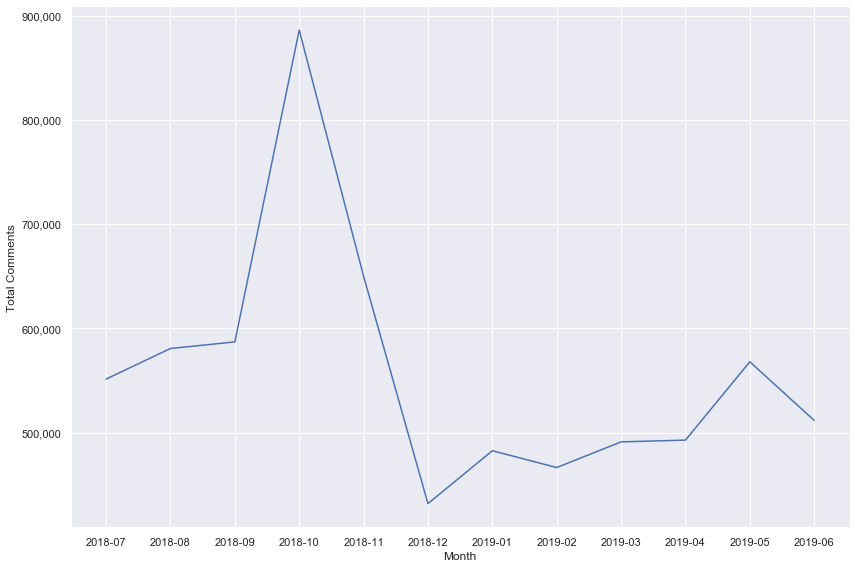

In [72]:
plt.figure(figsize=(12,8))
# plot barh chart with index as x values
ax = sns.lineplot(x=df['month'].astype(str), y=df['doc_count'])
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Month", ylabel='Total Comments')
plt.tight_layout()
plt.show()

# Graph 2

In [2]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [3]:
df = pd.read_pickle('cm_19_06')
df2 = pd.read_pickle('cm_19_05')
df3 = pd.read_pickle('cm_19_04')
df4 = pd.read_pickle('cm_19_03')
df5 = pd.read_pickle('cm_19_02')
df6 = pd.read_pickle('cm_19_01')

In [4]:
data_clean = pd.concat([df, df2], ignore_index=True)
data_clean = pd.concat([data_clean, df3], ignore_index=True)
data_clean = pd.concat([data_clean, df4], ignore_index=True)
data_clean = pd.concat([data_clean, df5], ignore_index=True)
data_clean = pd.concat([data_clean, df6], ignore_index=True)

In [5]:
data_clean.shape

(3011797, 5)

In [6]:
del df, df2, df3, df4, df5, df6

In [7]:
data_clean.drop_duplicates(subset='body', keep=False, inplace=True)
data_clean = data_clean[data_clean['author']!='Ilackfocus']
data_clean = data_clean[data_clean['author']!='[deleted]']
data_clean = data_clean[data_clean['author']!='AutoModerator']

In [8]:
token_pattern_no_number=u'(?ui)\\b\\w*[a-zA-Z]+\\w*\\b'
cv = CountVectorizer(stop_words = stopwords,
                     token_pattern=token_pattern_no_number,max_features=1000)
data_cv = cv.fit_transform(data_clean.body)

In [9]:
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

In [10]:
del data_clean

In [13]:
data_dtm.shape

(2777040, 1000)

In [21]:
sum_feat = data_dtm.sum(axis = 0, skipna = True)

In [24]:
del data_dtm

In [33]:
sum_feat.sort_values(ascending=False, inplace=True)

In [41]:
sum_feat.to_pickle('topfrequentword')

In [41]:
#pickle.dump(stopwords, open('stopwords_final', "wb"))

In [5]:
sum_feat = pd.read_pickle('topfrequentword')

In [2]:
infile = open('stopword_400_list','rb')
stop400 = pickle.load(infile)
infile.close()

In [3]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [4]:
stopwords = stopwords + stop400

In [6]:
freq_word_dict = sum_feat.to_dict()

In [7]:
for s in stopwords:
    if s in freq_word_dict:
        del freq_word_dict[s]

In [38]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stopwords, background_color="black", colormap="Dark2",
               max_font_size=150, random_state=42)

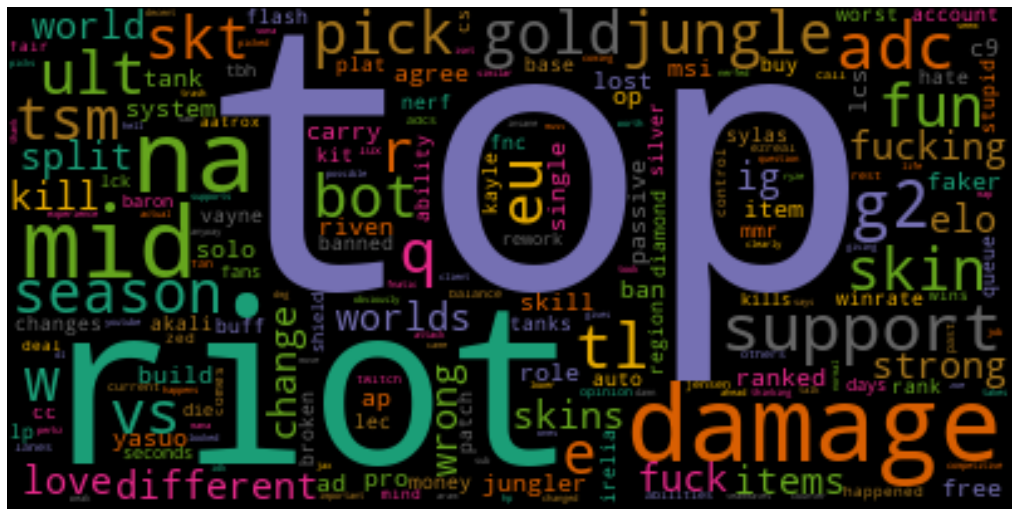

In [52]:
plt.rcParams['figure.figsize'] = [18, 12]
wc.generate_from_frequencies(freq_word_dict)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
    
plt.show()